# Dimension Reduction with PCA on MNIST images

### i) 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

def PCA_fit(X):
    centroid=np.mean(X,axis=0)
    sigma = np.dot((X- centroid).T, X-centroid)/X.shape[0]
    eigvals, eigvecs = np.linalg.eigh(sigma)
    return centroid, eigvals, eigvecs

def PCA_transform(Z, centroid, eigvacs, n):
    return np.dot(Z-centroid,eigvecs[:, -n:])

df = pd.read_csv('../input/03-train-mnist/03-train-mnist.csv', low_memory=False)
x = df.drop(['label'], axis=1)
y = df['label'].values.flatten()

train_data = np.array(x)
train_label = np.array(y)

digit_index= np.logical_or(train_label == 4,train_label == 7)
digit_index= np.logical_or(digit_index,train_label == 8)

X=train_data[digit_index]
n = X.shape[1]
centroid, eigvals, eigvecs = PCA_fit(X)



### ii)

244


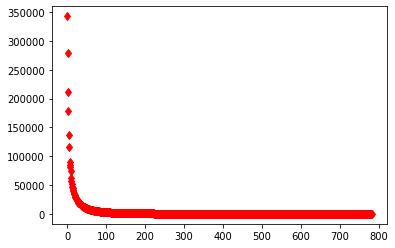

In [40]:
total_variance = np.cumsum(eigvals[:-n:-1])/np.sum(eigvals[:-n:-1])

porcent = 0.98
j=0
for i in total_variance:
    j = j+1
    if i == total_variance.flat[np.abs(total_variance-porcent).argmin()]:
        print(j)

plt.figure()
plt.plot(eigvals[:-n:-1], 'rd')

#### At least how many dimensions will you have to use in PCA in order to keep 98 percent of the total variance in data? 244

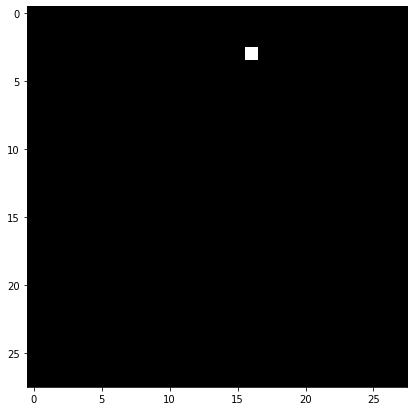

In [41]:
plt.figure(figsize=(7,7))
idx=100

y_plot= np.dot(eigvecs.T, eigvecs)

data = y_plot[100].reshape(28,28)
plt.imshow(data, cmap = plt.cm.gray)
plt.show()